In [0]:
%matplotlib inline
%tensorflow_version 1.x

import matplotlib.pyplot as plt
from keras.datasets import cifar10
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


##Underfitting Model

In [0]:
model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(8, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# dense layers
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 8)         608       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 12552     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                90        
Total params: 13,250
Trainable params: 13,250
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-6), 
    metrics=['acc'])

In [0]:
datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode='nearest'
    )

history = model.fit_generator(
    datagen.flow(train_images, train_labels, batch_size=8),
    steps_per_epoch=100,
    epochs=10,
    validation_data=datagen.flow(test_images, test_labels, batch_size=8),
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 1s 14ms/step - loss: 0.6796 - acc: 0.5915 - val_loss: 0.6799 - val_acc: 0.5940
Epoch 2/10
100/100 [==============================] - 1s 9ms/step - loss: 0.6780 - acc: 0.6036 - val_loss: 0.6762 - val_acc: 0.6093
Epoch 3/10
100/100 [==============================] - 1s 9ms/step - loss: 0.6757 - acc: 0.6113 - val_loss: 0.6762 - val_acc: 0.6195
Epoch 4/10
100/100 [==============================] - 1s 9ms/step - loss: 0.6745 - acc: 0.6236 - val_loss: 0.6735 - val_acc: 0.6253
Epoch 5/10
100/100 [==============================] - 1s 9ms/step - loss: 0.6731 - acc: 0.6293 - val_loss: 0.6742 - val_acc: 0.6260
Epoch 6/10
100/100 [==============================] - 1s 9ms/step - loss: 0.6726 - acc: 0.6361 - val_loss: 0.6702 - val_acc: 0.6493
Epoch 7/10
100/100 [==============================] - 1s 9ms/step - loss: 0.6714 - acc: 0.6453 - val_loss: 0.6701 - val_acc: 0.6415
Epoch 8/10
100/100 [==============================] - 1s 9ms/step - loss: 0

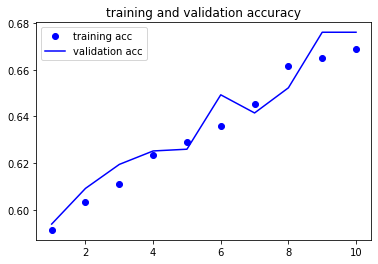

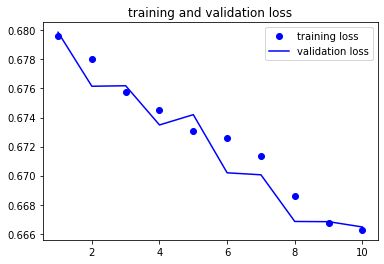

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

##Overfitting Model

In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
model2 = models.Sequential()
# conv layers
# 1
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D(2, 2))
# dense layers
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(10, activation='sigmoid'))

In [0]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               3686912   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 3,692,938
Trainable params: 3,692,938
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-4), 
    metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode='nearest'
    )
datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

history = model2.fit_generator(
    datagen.flow(train_images, train_labels, batch_size=20),
    steps_per_epoch=100,
    epochs=50,
    validation_data=datagen2.flow(test_images, test_labels, batch_size=20),
    validation_steps=50
)




Epoch 1/50





100/100 [==============================] - 8s 77ms/step - loss: 0.3283 - acc: 0.8958 - val_loss: 0.3129 - val_acc: 0.8997
Epoch 2/50
100/100 [==============================] - 7s 67ms/step - loss: 0.3001 - acc: 0.9003 - val_loss: 0.3049 - val_acc: 0.9004
Epoch 3/50
100/100 [==============================] - 7s 68ms/step - loss: 0.2863 - acc: 0.9007 - val_loss: 0.2959 - val_acc: 0.9001
Epoch 4/50
100/100 [==============================] - 7s 68ms/step - loss: 0.2814 - acc: 0.9015 - val_loss: 0.3014 - val_acc: 0.8985
Epoch 5/50
100/100 [==============================] - 7s 65ms/step - loss: 0.2737 - acc: 0.9024 - val_loss: 0.2946 - val_acc: 0.9027
Epoch 6/50
100/100 [==============================] - 7s 65ms/step - loss: 0.2700 - acc: 0.9016 - val_loss: 0.2875 - val_acc: 0.9012
Epoch 7/50
100/100 [==============================] - 7s 66ms/step - loss: 0.2597 - acc: 0.9043 - val_loss: 0.2876 - val_acc: 0.8982
Epoch 8/50
100/100 [==============================] - 7s 66ms

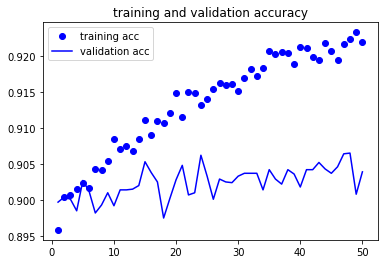

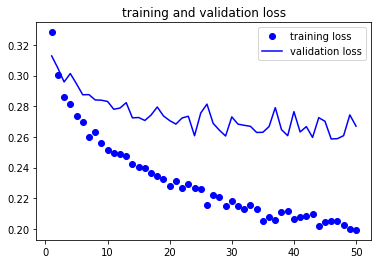

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

##Good Model

In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
model3 = models.Sequential()
# conv layers
# 1
model3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D(3, 3))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D(2, 2))
# dense layers
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(10, activation='sigmoid'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14400)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               7373312   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 7,380,234
Trainable params: 7,380,234
Non-trainable params: 0
____________________________________________

In [0]:
model3.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-4), 
    metrics=['acc'])

In [0]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

history = model3.fit_generator(
    datagen.flow(train_images, train_labels, batch_size=32),
    steps_per_epoch=100,
    epochs=50,
    validation_data=datagen.flow(test_images, test_labels, batch_size=32),
    validation_steps=50
)

Epoch 1/50
100/100 [==============================] - 17s 170ms/step - loss: 0.3268 - acc: 0.8958 - val_loss: 0.3069 - val_acc: 0.9000
Epoch 2/50
100/100 [==============================] - 16s 162ms/step - loss: 0.3001 - acc: 0.9000 - val_loss: 0.2932 - val_acc: 0.9002
Epoch 3/50
100/100 [==============================] - 16s 161ms/step - loss: 0.2959 - acc: 0.8993 - val_loss: 0.2955 - val_acc: 0.9008
Epoch 4/50
100/100 [==============================] - 16s 161ms/step - loss: 0.2889 - acc: 0.9000 - val_loss: 0.2809 - val_acc: 0.9002
Epoch 5/50
100/100 [==============================] - 16s 160ms/step - loss: 0.2843 - acc: 0.9012 - val_loss: 0.2834 - val_acc: 0.9013
Epoch 6/50
100/100 [==============================] - 16s 162ms/step - loss: 0.2831 - acc: 0.9006 - val_loss: 0.2770 - val_acc: 0.9002
Epoch 7/50
100/100 [==============================] - 16s 160ms/step - loss: 0.2791 - acc: 0.9009 - val_loss: 0.2771 - val_acc: 0.9016
Epoch 8/50
100/100 [==============================] - 1

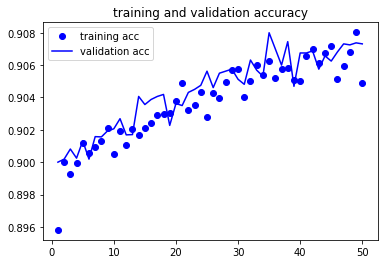

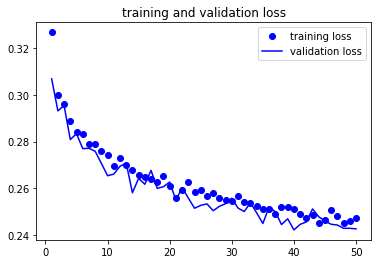

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()